# Analysis Objective

The goal of this analysis is to explore data about taxi rides in the Chicago area using samples of data from November 2017.

 More specifically, the objective is to understand the top taxi companies operating in the area, the most common neighborhoods that customers take taxis to, and to test the hypotheses as to whether the average duration of rides to the airport from a sample neighborhood (the Loop neighborhood) is different on rainy Saturdays compared to the entire dataset. 

# Analysis Plan

Here are the steps followed to conduct the analysis:
- Import the csv files
- Study the data they contain
- Ensure the data and data types are as expected
- Identify the top 10 neighborhoods customers take taxi rides to
- Visualize the taxi companies by number of trips
- Visualize the top 10 neighborhoods customers take taxi rides to by average trips
- Draw conclusions about the data
- Test the hypothesis that rides from the Loop neighborhood to O'Hare International Airport are  longer in duration, on average, on rainy Saturdays compared to all trips to the airport from Loop
- Draw conclusions about the hypothesis test

# Data Used in the Analysis

**Please see the data collection process section in the appendix of this project for an overview of how the data used in this project was collected through an HTML web request, HTML parsing, and SQL.**

The following three csv files are used:
- **trips_by_taxi_company.csv -> loaded into the dataframe trips_by_taxi_cmpny**: this file contains data around the number of taxi rides per taxi company from November 15-16, 2017
- **avg_trips_by_destination_neighborhood.csv -> loaded into the dataframe chi_drop_offs**: this file contains data around the average number of trips per neighborhood that taxi rides ended in in November 2017
- **loop_to_ohare_trips.csv -> loaded into the dataframe loop**: this file contains data on rides from the Loop neighborhood to O'Hare International Airport

# Data Definitions

**trips_by_taxi_cmpny dataframe:**
- *company_name:* the name of the taxi company
- *trips_amount:* the number of trips conducted by each taxi company

**chi_drop_offs dataframe:**
- *dropoff_location_name:* the name of the neighborhood that the taxi ride ended in
- *average_trips:* the average number of trips that ended in the specified neighborhood

**loop_rides dataframe:**
- *start_ts:* the datetime value of when the taxi ride started
- *weather_conditions:* the value of this field is 'Bad' if the weather was rainy or stormy, but 'Good' otherwise
- *duration_seconds:* the duration of the taxi ride in seconds

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# load csv for number of trips per taxi company from Nov 15-16, 2017
trips_by_taxi_cmpny = pd.read_csv('trips_by_taxi_comapany.csv')

# load csv for drop-offs per Chicago neighborhood in November 2017
chi_drop_offs = pd.read_csv('avg_trips_by_destination_neighborhood.csv')

In [3]:
# check trips_by_taxi_cmpny for duplicate values
trips_by_taxi_cmpny.duplicated().sum()

0

In [4]:
# get info about trips_by_taxi_cmpny
trips_by_taxi_cmpny.info()

# preview df
trips_by_taxi_cmpny.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


I can confirm that the data is as expected. There are no missing values and the data types are correct.

In [5]:
# describe trips_by_taxi_cmpny
trips_by_taxi_cmpny.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


The data is right-skewed with a much higher mean than its median at 2,145.5 vs. 178.5 rides, respectively. The top taxi companies in the area hold a lot of market share. 

In [6]:
# check chi_drop_offs for duplicate values
chi_drop_offs.duplicated().sum()

0

In [7]:
# get info about chi_drop_offs
chi_drop_offs.info()

# preview df
chi_drop_offs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


I can confirm that the data is as expected. There are no missing values and the data types are correct.

In [8]:
# describe chi_drop_offs
chi_drop_offs.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


This data set is also right-skewed. The avg. number of trips is 600.0 while the median is 52.0 trips.

In [9]:
# get top ten neighborhoods by average trips, drop-off neighborhood then print it
top_ten_drop_offs = chi_drop_offs.sort_values(by='average_trips', ascending=False).reset_index(drop=True).iloc[0:10]
print(top_ten_drop_offs)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


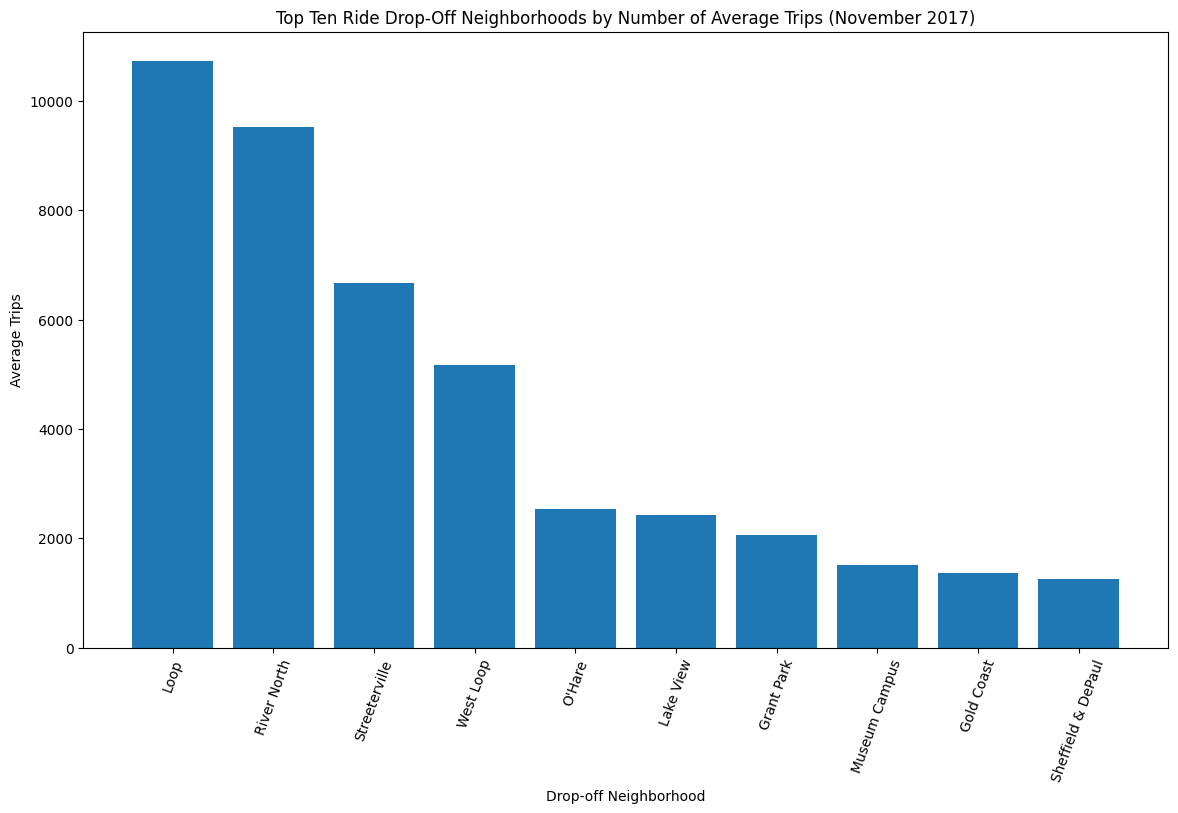

In [10]:
# plot top ten drop-off neighborhoods by avg. trips desc
plt.figure(figsize=(14,8)) # set fig size
plt.bar(top_ten_drop_offs['dropoff_location_name'], top_ten_drop_offs['average_trips']) # plot bar plot
plt.xlabel('Drop-off Neighborhood') # set x-label
plt.ylabel('Average Trips') # set y-label
plt.xticks(rotation=70) # rotate x-labels
plt.title('Top Ten Ride Drop-Off Neighborhoods by Number of Average Trips (November 2017)') # set title
plt.show() # show plot

The Loop, River North, Streeterville, and West Loop neighborhoods have a notably higher number of average trips. Perhaps they are the most common neighborhoods to be dropped off in because they are popular, larger (higher population density), wealthier, or harder to acccess via convenient public transit routes.

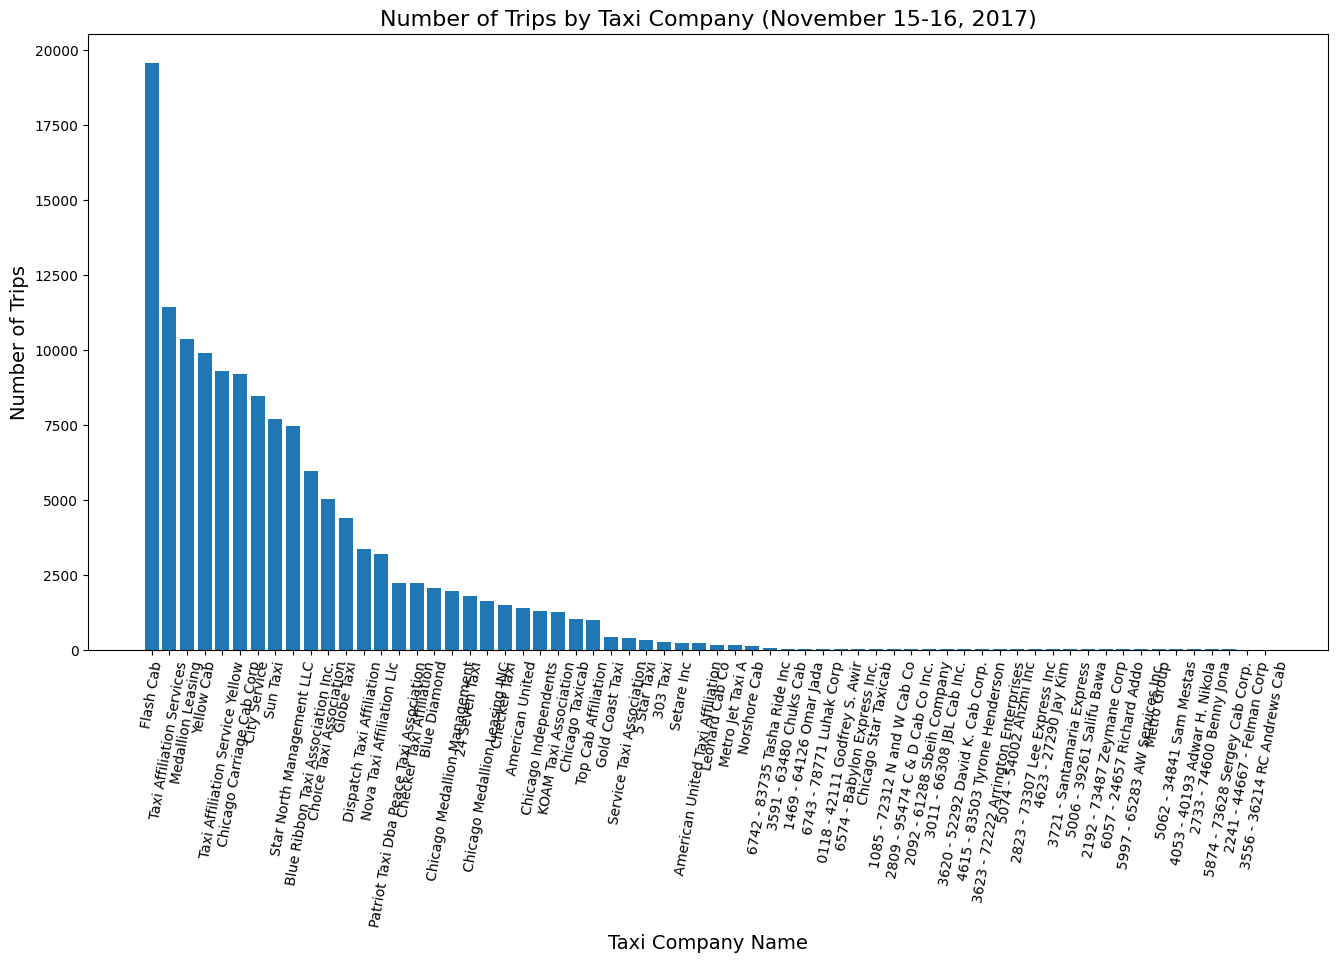

In [11]:
# plot top ten drop-off neighborhoods by avg. trips desc
plt.figure(figsize=(16,8)) # set fig size

plt.bar(trips_by_taxi_cmpny['company_name'], trips_by_taxi_cmpny['trips_amount']) # plot bar chart

plt.xlabel('Taxi Company Name', fontsize=14) # set y labels and their font size
plt.ylabel('Number of Trips', fontsize=14) # set x labels and their font size
plt.xticks(rotation=80) # rotate x labels
plt.title('Number of Trips by Taxi Company (November 15-16, 2017)', fontsize=16) # set title and its font size

plt.show() # show plot

Flash Cab had the highest average number of trips in November 2017 by a considerable margin (8.1K rides). Sixteen cab companies had a number of trips equal to or greater than the average for the data set. About 25% of companies dominate the market so it looks like it's a highly competitive market and hence, difficult for new companies to enter.

In [12]:
# load csv containing data on rides from the Loop neighborhood to O'Hare International Airport
loop_rides = pd.read_csv('loop_to_ohare_trips.csv', parse_dates=['start_ts'])

# preview df
print(loop_rides.head(),"\n")

# get info about df
loop_rides.info()

# convert durations_seconds to data type int
loop_rides['duration_seconds'] = loop_rides['duration_seconds'].astype(int)

             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


*_Test the hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays._*

H0 (Null Hypothesis): The mean of duration of rides (in seconds) on rainy Saturdays is equal to the dataset's overall mean ride duration length.

H1 (Alternative Hypothesis): The mean of duration of rides (in seconds) on rainy Saturdays is different than the dataset's overall mean ride duration length.

In [13]:
# test the hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

# store the mean ride duration for rainy Saturdays in a variable
rainy_sat = loop_rides[(loop_rides['weather_conditions'] == 'Bad') & (loop_rides['start_ts'].dt.dayofweek == 5)]['duration_seconds']

all_rides = loop_rides['duration_seconds']

# set the critical statistical significance level
alpha = 0.05  

# apply the independent two-sample t-test method to rainy_sat and all_rides (which have unequal variances)
results = st.ttest_ind(rainy_sat, all_rides, equal_var=False)

# print the p-value
print('p-value: ', results.pvalue)

# if the p-value is less than alpha, we reject the hypothesis
if results.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")


print(f"\nThe average ride duration (seconds) on rainy Saturdays is: {rainy_sat.mean():.1f}.")
print(f"\nThe average ride duration (seconds) on rainy Saturdays is: {all_rides.mean():.1f}.")

p-value:  5.013652852599471e-09
We reject the null hypothesis.

The average ride duration (seconds) on rainy Saturdays is: 2427.2.

The average ride duration (seconds) on rainy Saturdays is: 2071.7.


We reject the null hypothesis because the p-value is below the alpha value of 0.05. The average ride duration (seconds) on rainy Saturdays is different (higher) than that of the overall dataset at statistical significance.

I selected an alpha value of 0.5 because this is the standard critical statistical significance level and accounts for statistically significance between the means of the two samples without specification as to how they may differ i.e. it does not matter if one sample's mean is higher or lower than the other's at statistical significace.

# Analysis Conclusion

The taxi company market in the Chicago area is very competitive. Sixteen taxi companies accounted for 75% of trip volume for the analyzed sample while one company, Flash Cab, led the market in trip volume by a signifcant lead. The dataset for trips by taxi company is heavily right-skewed--the relatively higher performance of top companies drives this behavior. 

The most popular neighborhoods that customers took taxis to were the Loop, River North, Streeterville, and West Loop neighborhoods. This data is also heavily right-skewed with the top ten drop-off neighborhoods greatly exceeding the 75th percentile of average trips values. We can hypothesize that certain neighborhoods are larger/more population dense, wealthier, or harder to access via public transportation than the majority of other neighborhoods with a much lower number of average trips.

Lastly, we can confirm that the average trip duration on rainy Saturdays from the Loop neighborhood to O'Hare International Airport was different than that of all trips with the same trip start and end points. The duration of rides (in seconds) was higher at a statistically significant result on rainy Saturdays at 2,427.2 seconds vs. the overall average of 2,071.7 seconds (about a 6 minute difference). Bad weather coupled with a busy travel day and city traffic is no joke! 

# Appendix

### HTTP Web Request for Chicago Weather Data
*The resulting data from the code cell below is the data contained in the weather_records table within the database detailed further down in this appendix.*

In [1]:
import requests
from bs4 import BeautifulSoup

# set URL to get request from and then get request as text
URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req_text = requests.get(URL).text

# specify request and parser to use with BeautifulSoup
soup = BeautifulSoup(req_text,'lxml')

# find the weather_records table from the HTML response
table = soup.find(
    'table', attrs={"id": "weather_records"}
) 

# find table headers and append to heading_table list
heading_table = []
for row in table.find_all('th'):
    heading_table.append(row.text)

# find table cells and append to content list
content = []
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])

weather_records = (
    pd.DataFrame(content, columns=heading_table)
)  # DataFrame with the data on weather records

print(weather_records)

           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


### Database Overview

*The following database was provided to query within the TripleTen UI but is not available to query within this project.* 

*The below database overview and related SQL queries are provided within this notebook to demonstrate the process I followed in preparation for the project.*

**Description of the database with info on taxi rides in Chicago**

- **neighborhoods table:** data on city neighborhoods
    - *name:* name of the neighborhood
    - *neighborhood_id:* neighborhood code

- **cabs table:** data on taxis
    - *cab_id:* vehicle code
    - *vehicle_id:* the vehicle's technical ID
    - *company_name:* the company that owns the vehicle

- **trips table:** data on rides
    - *trip_id:* ride code
    - *cab_id:* code of the vehicle operating the ride
    - *start_ts:* date and time of the beginning of the ride (time rounded to the hour)
    - *end_ts:* date and time of the end of the ride (time rounded to the hour)
    - *duration_seconds:* ride duration in seconds
    - *distance_miles:* ride distance in miles
    - *pickup_location_id:* pickup neighborhood code
    - *dropoff_location_id:* dropoff neighborhood code

- **weather_records table:** data on weather
    - *record_id:* weather record code
    - *ts:* record date and time (time rounded to the hour)
    - *temperature:* temperature when the record was taken
    - *description:* brief description of weather conditions, e.g. "light rain" or "scattered clouds"



#### Table Scheme

![Entity Relationship Diagram](https://practicum-content.s3.us-west-1.amazonaws.com/resources/moved_Untitled_1_1585510727.png)

### SQL Query to Produce Data in trips_by_taxi_company.csv

**Query to find the number of taxi rides for each taxi company for November 15-16, 2017:**

<pre style="font-family: monospace; line-height: 1.5;">
  <span style="color: #d73a49; font-weight: bold;">SELECT</span>
      cabs.company_name,
      <span style="color: #d73a49; font-weight: bold;">COUNT</span>(trips.trip_id) <span style="color: #d73a49; font-weight: bold;">AS</span> trips_amount
  <span style="color: #d73a49; font-weight: bold;">FROM</span> cabs
  <span style="color: #d73a49; font-weight: bold;">INNER JOIN</span> trips <span style="color: #d73a49; font-weight: bold;">ON</span> trips.cab_id = cabs.cab_id
  <span style="color: #d73a49; font-weight: bold;">WHERE</span> <span style="color: #d73a49; font-weight: bold;">CAST</span>(trips.start_ts <span style="color: #d73a49; font-weight: bold;">AS</span> DATE) <span style="color: #d73a49; font-weight: bold;">BETWEEN</span> <span style="color: #032f62;">'2017-11-15'</span> <span style="color: #d73a49; font-weight: bold;">AND</span> <span style="color: #032f62;">'2017-11-16'</span>
  <span style="color: #d73a49; font-weight: bold;">GROUP BY</span> cabs.company_name
  <span style="color: #d73a49; font-weight: bold;">ORDER BY</span> <span style="color: #d73a49; font-weight: bold;">COUNT</span>(trips.trip_id) <span style="color: #d73a49; font-weight: bold;">DESC</span>;
</pre>


### SQL Queries to Produce Data in loop_to_ohare_trips.csv

**Query to retrieve the identifiers of the O'Hare and Loop neighborhoods from the neighborhoods table:**


<pre style="font-family: monospace; line-height: 1.5;">
  <span style="color: #d73a49; font-weight: bold;">SELECT</span>
      neighborhood_id,
      name
  <span style="color: #d73a49; font-weight: bold;">FROM</span> neighborhoods
  <span style="color: #d73a49; font-weight: bold;">WHERE</span> name <span style="color: #005cc5;">LIKE</span> <span style="color: #032f62;">'%Hare'</span> 
  <span style="color: #d73a49; font-weight: bold;">OR</span> name <span style="color: #005cc5;">LIKE</span> <span style="color: #032f62;">'Loop'</span>;
</pre>



**Query to retrieve the weather condition records, for each hour, from the weather_records table:**


<pre style="font-family: monospace; line-height: 1.5;">
  <span style="color: #d73a49; font-weight: bold;">SELECT</span>
      ts,
      <span style="color: #d73a49; font-weight: bold;">CASE</span> <span style="color: #d73a49; font-weight: bold;">WHEN</span> description <span style="color: #005cc5;">LIKE</span> <span style="color: #032f62;">'%rain%'</span> 
      <span style="color: #d73a49; font-weight: bold;">OR</span> description <span style="color: #005cc5;">LIKE</span> <span style="color: #032f62;">'%storm%'</span> <span style="color: #d73a49; font-weight: bold;">THEN</span> <span style="color: #032f62;">'Bad'</span>
          <span style="color: #d73a49; font-weight: bold;">ELSE</span> <span style="color: #032f62;">'Good'</span>
          <span style="color: #d73a49; font-weight: bold;">END</span> <span style="color: #d73a49; font-weight: bold;">AS</span> weather_conditions
  <span style="color: #d73a49; font-weight: bold;">FROM</span> weather_records;
</pre>



**Query to retrieve all the rides that started in the Loop (pickup_location_id: 50) on a Saturday and ended at O'Hare (dropoff_location_id: 63) including the weather conditions for each ride and the duration of each ride:**


<pre style="font-family: monospace; line-height: 1.5;">
  <span style="color: #d73a49; font-weight: bold;">SELECT</span>
      trips.start_ts,
      <span style="color: #d73a49; font-weight: bold;">CASE</span> <span style="color: #d73a49; font-weight: bold;">WHEN</span> weather_records.description <span style="color: #005cc5;">LIKE</span> <span style="color: #032f62;">'%rain%'</span> 
      <span style="color: #d73a49; font-weight: bold;">OR</span> weather_records.description <span style="color: #005cc5;">LIKE</span> <span style="color: #032f62;">'%storm%'</span> <span style="color: #d73a49; font-weight: bold;">THEN</span> <span style="color: #032f62;">'Bad'</span> 
      <span style="color: #d73a49; font-weight: bold;">ELSE</span> <span style="color: #032f62;">'Good'</span> 
      <span style="color: #d73a49; font-weight: bold;">END</span> <span style="color: #d73a49; font-weight: bold;">AS</span> weather_conditions,
      trips.duration_seconds
  <span style="color: #d73a49; font-weight: bold;">FROM</span> trips
  <span style="color: #d73a49; font-weight: bold;">INNER JOIN</span> weather_records <span style="color: #d73a49; font-weight: bold;">ON</span> weather_records.ts = trips.start_ts
  <span style="color: #d73a49; font-weight: bold;">WHERE</span> (trips.pickup_location_id = 50
          <span style="color: #d73a49; font-weight: bold;">AND</span> <span style="color: #d73a49; font-weight: bold;">EXTRACT</span>(isodow <span style="color: #d73a49; font-weight: bold;">FROM</span> trips.start_ts) = 6)
              <span style="color: #d73a49; font-weight: bold;">AND</span> trips.dropoff_location_id = 63
                  <span style="color: #d73a49; font-weight: bold;">AND</span> description <span style="color: #d73a49; font-weight: bold;">IS NOT NULL</span>
  <span style="color: #d73a49; font-weight: bold;">ORDER BY</span> trips.trip_id;
</pre>



**Note: The avg_trips_by_destination_neighborhood.csv file was provided by TripleTen directly for use in this project.**